# CEDA UK to GeoCroissant Support
<img src="../assets/GeoCroissant.jpg" alt="GeoCroissant" width="150" style="float: right; margin-left: 50px;">

## Overview

This notebook demonstrates how to convert CEDA UK STAC (SpatioTemporal Asset Catalog) metadata to GeoCroissant format, which is an extension of the Croissant metadata standard for geospatial datasets.

# Install dependencies

In [1]:
# Install dependencies
try:
    from ceda_datapoint import DataPointClient
except ImportError as exc:
    !pip install ceda-datapoint
    from ceda_datapoint import DataPointClient

# Create a client instance - for searching the CEDA STAC catalog

In [2]:
from ceda_datapoint import DataPointClient

client = DataPointClient(org="CEDA")
client


<DataPointClient: CEDA-268949>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA

# Basic search
Perform a basic search of the CMIP6 climate model simulations dataset, filtering on experiment, activity and institution:

In [3]:
search_basic = client.search(
    collections=["cmip6"],
    query=[
        "cmip6:experiment_id=ssp585",
        "cmip6:activity_id=ScenarioMIP",
        "cmip6:institution_id=KIOST",
    ],
    max_items=10,
)

# Collect up the "cloud assets" connected with the search results
This method collects up the cloud assets, which may be Zarr, NetCDF or Kerchunk files. The latter represent an index that points to content within other files (typically NetCDF).

The files themselves can be served over a variety of protocols, including:

POSIX: local file system
HTTP(S): old-fashioned HTTP(S) access
S3: using Amazon's S3 protocol (over HTTP(S))
We identify them and then list the related products.

In [4]:
cluster = search_basic.collect_cloud_assets()
cluster


<DataPointCluster: CEDA-268949-403728-223289 (Datasets: 10)>
 - url: https://api.stac.ceda.ac.uk
 - organisation: CEDA
 - search_terms: {'query': ['cmip6:experiment_id=ssp585', 'cmip6:activity_id=ScenarioMIP', 'cmip6:institution_id=KIOST'], 'max_items': 10}
 - collections: ['cmip6']
 - products: 10
Products:
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsus.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rsds.gr1.v20191106-reference_file: kerchunk
 - CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.rlus.gr1.v20191106-

In [5]:
product = cluster[2]
ds = product.open_dataset()

In [6]:
dir(product)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_mapper',
 '_multiple_options',
 '_open_cfa',
 '_open_cog',
 '_open_kerchunk',
 '_open_zarr',
 '_prepare_dataset',
 '_set_visibility',
 'attributes',
 'bbox',
 'cloud_format',
 'collection',
 'end_datetime',
 'get_attribute',
 'help',
 'href',
 'id',
 'info',
 'meta',
 'open_asset',
 'open_dataset',
 'stac_attributes',
 'start_datetime',
 'units',
 'variables']

# Select a product and use it (as an Xarray Dataset)
A product has an .open_dataset() method, which loads it (lazily) into an xarray.Dataset, making it ready for use in the Python session.

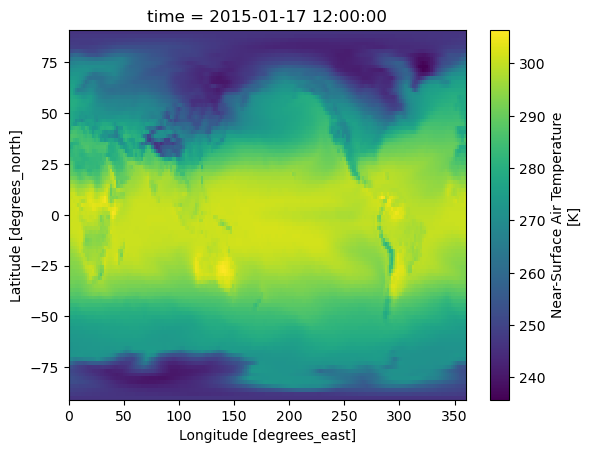

In [7]:
tas_product = None

for product in cluster:
    if "tas" in product.id:
        tas_product = product
        break

if tas_product:
    ds = tas_product.open_dataset()
    ds.tas.sel(time="2015-01-17 12:00:00").squeeze().plot()
else:
    print("tas variable not found in cluster")

In [8]:
for product in cluster:
    if "tas" in product.id:
        print(product.id)
        print(product.stac_attributes.keys())
        print(product.stac_attributes)
        break

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 

In [9]:
for product in cluster:
    print(f"\nProduct ID: {product.id}")
    print("Available stac_attributes keys:", product.stac_attributes.keys())


Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.vas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.uas.gr1.v20210319-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.sfcWind.gr1.v20191106-reference_file
Available stac_attributes keys: dict_keys(['type', 'stac_version', 'stac_extensions', 'id', 'geometry', 'bbox', 'links', 'collection'])

Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.s

In [10]:
tas_products = [p for p in cluster if "tas" in p.id]

for p in tas_products:
    print(p.id)

CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file


In [11]:
# Access metadata for the selected 'tas' product
if tas_product:
    metadata = tas_product.stac_attributes
    print("STAC Metadata for Product ID:", tas_product.id)
    print("STAC Attributes:", metadata)

    # If you'd like to see more details or other attributes:
    for key, value in metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

STAC Metadata for Product ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
STAC Attributes: {'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.s

In [12]:
if tas_product:
    # Extract STAC metadata fields
    metadata = tas_product.stac_attributes
    item_metadata = {
        "ID": tas_product.id,
        "Type": metadata.get("type"),
        "STAC Version": metadata.get("stac_version"),
        "Collection": metadata.get("collection"),
        "Links": metadata.get("links"),
        "Bounding Box": metadata.get("bbox"),
        "Geometry": metadata.get("geometry"),
    }

    # Display metadata
    for key, value in item_metadata.items():
        print(f"{key}: {value}")
else:
    print("tas product not found.")

ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
Type: Feature
STAC Version: 1.1.0
Collection: cmip6
Links: [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}]
Bounding Box: [-179.0625, -90.0, 179.0625, 90.0]
Geometry: {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}


In [13]:
print(dir(tas_product))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_mapper', '_multiple_options', '_open_cfa', '_open_cog', '_open_kerchunk', '_open_zarr', '_prepare_dataset', '_set_visibility', 'attributes', 'bbox', 'cloud_format', 'collection', 'end_datetime', 'get_attribute', 'help', 'href', 'id', 'info', 'meta', 'open_asset', 'open_dataset', 'stac_attributes', 'start_datetime', 'units', 'variables']


# Inspecting Metadata in a STAC Item

In [14]:
# Try checking the 'variables' attribute to see if the data is present there
print(tas_product.variables)

# Or inspect the 'stac_attributes' for any relevant metadata
print(tas_product.stac_attributes)

# You can also explore 'attributes' if the other two don't help
print(tas_product.attributes)

WARNING [ceda_datapoint.mixins.properties]: Attribute not found from options: ['variables', 'variable_long_name']


None
{'type': 'Feature', 'stac_version': '1.1.0', 'stac_extensions': ['https://stac-extensions.github.io/cmip6/v1.0.0/schema.json'], 'id': 'CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'geometry': {'type': 'Polygon', 'coordinates': [[[-179.0625, -90.0], [179.0625, -90.0], [179.0625, 90.0], [-179.0625, 90.0], [-179.0625, -90.0]]]}, 'bbox': [-179.0625, -90.0, 179.0625, 90.0], 'links': [{'rel': 'self', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6/items/CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106', 'type': 'application/geo+json'}, {'rel': 'parent', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json'}, {'rel': 'collection', 'href': 'https://api.stac.ceda.ac.uk/collections/cmip6', 'type': 'application/json', 'title': 'CMIP6'}, {'rel': 'root', 'href': 'https://api.stac.ceda.ac.uk', 'type': 'application/json', 'title': 'CEDA STAC API'}], 'collection': 'cmip6'}
{'title': 'CMIP6.ScenarioMIP.KIOST

# CMIP6 STAC to GeoCroissant Converter

In [15]:
import json
import hashlib
from pathlib import Path
from urllib.parse import urlparse
from ceda_datapoint import DataPointClient


def get_asset_type(asset):
    """Determine asset type from asset properties or file extension"""
    # Check if asset has type or media_type attributes
    if hasattr(asset, "type"):
        return asset.type
    if hasattr(asset, "media_type"):
        return asset.media_type

    # For CEDA BasicAsset objects, try to get the URL from different attributes
    url = None
    if hasattr(asset, "href"):
        url = asset.href
    elif hasattr(asset, "url"):
        url = asset.url
    elif hasattr(asset, "contentUrl"):
        url = asset.contentUrl
    elif hasattr(asset, "content_url"):
        url = asset.content_url

    if url:
        path = urlparse(url).path.lower()
        if path.endswith(".json"):
            return "application/json"
        elif path.endswith((".nc", ".netcdf", ".cdf")):
            return "application/netcdf"
        elif path.endswith(".zarr"):
            return "application/zarr"
        elif path.endswith((".tif", ".tiff", ".geotiff")):
            return "image/tiff"
        else:
            return "application/octet-stream"

    # Default fallback
    return "application/octet-stream"


def stac_to_geocroissant(stac_item, file_hash=None, filename=None):
    """Convert a CEDA STAC item to valid GeoCroissant format, optionally adding hash and filename"""
    if hasattr(stac_item, "stac_attributes"):
        # Get basic STAC metadata
        stac_attrs = stac_item.stac_attributes
        bbox = stac_item.bbox
        geometry = stac_attrs.get("geometry", {})
        item_id = stac_item.id

        # Get rich CMIP6 metadata from attributes
        properties = stac_item.attributes if hasattr(stac_item, "attributes") else {}
        assets = stac_item.get_assets()
    else:
        properties = stac_item.get("properties", {})
        assets = stac_item.get("assets", {})
        bbox = stac_item.get("bbox", [])
        geometry = stac_item.get("geometry", {})
        item_id = stac_item.get("id", "unknown")

    variable_name = properties.get("cmip6:variable_long_name", "Unknown")
    variable_id = properties.get("cmip6:variable_id", "tas")
    variable_units = properties.get("cmip6:variable_units", "K")

    croissant_metadata = {
        "@context": {
            "@language": "en",
            "@vocab": "https://schema.org/",
            "citeAs": "cr:citeAs",
            "column": "cr:column",
            "conformsTo": "dct:conformsTo",
            "cr": "http://mlcommons.org/croissant/",
            "geocr": "http://mlcommons.org/croissant/geocr/",
            "rai": "http://mlcommons.org/croissant/RAI/",
            "dct": "http://purl.org/dc/terms/",
            "sc": "https://schema.org/",
            "data": {"@id": "cr:data", "@type": "@json"},
            "examples": {"@id": "cr:examples", "@type": "@json"},
            "dataBiases": "cr:dataBiases",
            "dataCollection": "cr:dataCollection",
            "dataType": {"@id": "cr:dataType", "@type": "@vocab"},
            "extract": "cr:extract",
            "field": "cr:field",
            "fileProperty": "cr:fileProperty",
            "fileObject": "cr:fileObject",
            "fileSet": "cr:fileSet",
            "format": "cr:format",
            "includes": "cr:includes",
            "isLiveDataset": "cr:isLiveDataset",
            "jsonPath": "cr:jsonPath",
            "key": "cr:key",
            "md5": "cr:md5",
            "parentField": "cr:parentField",
            "path": "cr:path",
            "personalSensitiveInformation": "cr:personalSensitiveInformation",
            "recordSet": "cr:recordSet",
            "references": "cr:references",
            "regex": "cr:regex",
            "repeated": "cr:repeated",
            "replace": "cr:replace",
            "samplingRate": "cr:samplingRate",
            "separator": "cr:separator",
            "source": "cr:source",
            "subField": "cr:subField",
            "transform": "cr:transform",
        },
        "@type": "sc:Dataset",
        "name": properties.get("title", item_id),
        "alternateName": [
            f"CMIP6-{variable_id}",
            f"{properties.get('cmip6:institution_id', 'Unknown')}-{variable_id}",
            f"{properties.get('cmip6:experiment_id', 'Unknown')}-{variable_id}",
        ],
        "description": (
            f"CMIP6 dataset for {variable_name} ({variable_id}) from"
            f" {properties.get('cmip6:institution_id', 'Unknown')} model. This dataset"
            f" contains {variable_name} data for the"
            f" {properties.get('cmip6:experiment_title', 'Unknown experiment')} scenario."
        ),
        "conformsTo": "http://mlcommons.org/croissant/1.0",
        "version": "1.0.0",
        "creator": {
            "@type": "Organization",
            "name": properties.get("cmip6:institution_id", "Unknown Institution"),
            "url": f"https://www.wcrp-climate.org/wgcm-cmip/wgcm-cmip6",
        },
        "url": f"https://api.stac.ceda.ac.uk/collections/cmip6/items/{item_id}",
        "keywords": [
            "CMIP6",
            "climate modeling",
            variable_name.lower(),
            variable_id,
            properties.get("cmip6:activity_id", "").lower(),
            properties.get("cmip6:experiment_id", "").lower(),
            properties.get("cmip6:institution_id", "").lower(),
            "netcdf",
            "geospatial",
            "climate data",
            "temperature",
            "atmospheric data",
            "model output",
        ],
        "citeAs": properties.get(
            "cmip6:citation_url",
            f"https://api.stac.ceda.ac.uk/collections/cmip6/items/{item_id}",
        ),
        "datePublished": properties.get(
            "created", properties.get("updated", "2021-12-31")
        ),
        "license": "https://creativecommons.org/licenses/by/4.0/",
        "geocr:BoundingBox": bbox,
        "geocr:temporalExtent": {
            "startDate": properties.get("start_datetime", ""),
            "endDate": properties.get("end_datetime", ""),
        },
        "distribution": [
            {
                "@type": "cr:FileObject",
                "@id": asset_key,
                "name": filename if filename else asset_key,
                "description": f"{asset_key} asset for {item_id}",
                "contentUrl": (
                    download_url
                    if asset_key.startswith("data")
                    else (
                        f"https://api.stac.ceda.ac.uk/collections/cmip6/items/{item_id}"
                    )
                ),
                "encodingFormat": (
                    "application/netcdf"
                    if asset_key.startswith("data")
                    else "application/json"
                ),
                "md5": (
                    file_hash
                    if file_hash and asset_key.startswith("data")
                    else "placeholder_hash"
                ),
                "sha256": (
                    file_hash
                    if file_hash and asset_key.startswith("data")
                    else "placeholder_hash"
                ),
            }
            for asset_key, asset in assets.items()
        ]
        + [
            {
                "@type": "cr:FileSet",
                "@id": "data_files",
                "name": "data_files",
                "description": "NetCDF data files",
                "includes": "*.nc",
                "encodingFormat": "application/netcdf",
            }
        ],
        "recordSet": [
            {
                "@type": "cr:RecordSet",
                "@id": "geospatial_metadata",
                "name": "geospatial_metadata",
                "description": "Geospatial metadata extracted from STAC",
                "field": [
                    {
                        "@type": "cr:Field",
                        "@id": "geospatial_metadata/bounding_box",
                        "name": "bounding_box",
                        "description": "Dataset bounding box",
                        "dataType": "sc:Text",
                        "data": bbox,
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "geospatial_metadata/geometry",
                        "name": "geometry",
                        "description": "Dataset geometry",
                        "dataType": "sc:Text",
                        "data": geometry,
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "geospatial_metadata/temporal_coverage",
                        "name": "temporal_coverage",
                        "description": "Temporal coverage",
                        "dataType": "sc:Text",
                        "data": (
                            f"{properties.get('start_datetime', '')}/{properties.get('end_datetime', '')}"
                        ),
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                ],
            },
            {
                "@type": "cr:RecordSet",
                "@id": "cmip6_metadata",
                "name": "cmip6_metadata",
                "description": "CMIP6-specific metadata",
                "field": [
                    {
                        "@type": "cr:Field",
                        "@id": "cmip6_metadata/activity_id",
                        "name": "activity_id",
                        "description": "CMIP6 activity ID",
                        "dataType": "sc:Text",
                        "data": properties.get("cmip6:activity_id", ""),
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "cmip6_metadata/experiment_id",
                        "name": "experiment_id",
                        "description": "CMIP6 experiment ID",
                        "dataType": "sc:Text",
                        "data": properties.get("cmip6:experiment_id", ""),
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "cmip6_metadata/variable_id",
                        "name": "variable_id",
                        "description": "CMIP6 variable ID",
                        "dataType": "sc:Text",
                        "data": variable_id,
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "cmip6_metadata/variable_long_name",
                        "name": "variable_long_name",
                        "description": "CMIP6 variable long name",
                        "dataType": "sc:Text",
                        "data": variable_name,
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "cmip6_metadata/variable_units",
                        "name": "variable_units",
                        "description": "CMIP6 variable units",
                        "dataType": "sc:Text",
                        "data": variable_units,
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "cmip6_metadata/experiment_title",
                        "name": "experiment_title",
                        "description": "CMIP6 experiment title",
                        "dataType": "sc:Text",
                        "data": properties.get("cmip6:experiment_title", ""),
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "cmip6_metadata/frequency",
                        "name": "frequency",
                        "description": "CMIP6 data frequency",
                        "dataType": "sc:Text",
                        "data": properties.get("cmip6:frequency", ""),
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "cmip6_metadata/realm",
                        "name": "realm",
                        "description": "CMIP6 realm",
                        "dataType": "sc:Text",
                        "data": properties.get("realm", []),
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                    {
                        "@type": "cr:Field",
                        "@id": "cmip6_metadata/cf_standard_name",
                        "name": "cf_standard_name",
                        "description": "CF standard name",
                        "dataType": "sc:Text",
                        "data": properties.get("cmip6:cf_standard_name", ""),
                        "source": {"fileSet": {"@id": "data_files"}},
                    },
                ],
            },
        ],
    }
    return croissant_metadata


# === Step 1: Connect to CEDA and search for CMIP6 tas product (SSP585, KIOST) ===
client = DataPointClient(org="CEDA")
search = client.search(
    collections=["cmip6"],
    query=[
        "cmip6:experiment_id=ssp585",
        "cmip6:activity_id=ScenarioMIP",
        "cmip6:institution_id=KIOST",
        "cmip6:variable_id=tas",
    ],
    max_items=1,
)
_, stac_item = next(iter(search.items.items()))

# === Step 2: Get actual data URLs from CEDA ===
assets = stac_item.get_assets()
print("Available assets:")
for asset_key, asset in assets.items():
    print(f"  {asset_key}: {type(asset)}")
    print(f"    Asset ID: {asset.meta.get('asset_id', 'Unknown')}")

# Get the actual data file URLs from CEDA
try:
    data_files = stac_item.get_data_files()
    print(f"\nData files found: {len(data_files)}")
    for i, data_url in enumerate(data_files):
        print(f"  [{i}]: {data_url}")

    # Use the first data file URL
    if data_files:
        download_url = data_files[0]
        filename = download_url.split("/")[-1]
        print(f"\nUsing data file: {filename}")
        print(f"Download URL: {download_url}")
    else:
        raise RuntimeError("No data files found")

except Exception as e:
    print(f"Error getting data files: {e}")
    raise RuntimeError("Could not get data file URLs from CEDA")

# Skip download and use placeholder hash
print("Skipping download - using placeholder hash")
file_hash = "placeholder_hash"
print(f"Using placeholder hash: {file_hash}")

# === Step 3: (Optional) Open dataset for variable and coordinate names ===
try:
    ds = stac_item.open_dataset()
    data_vars = list(ds.data_vars)
    coord_vars = list(ds.coords)
    print("Variables found:", data_vars + coord_vars)
except Exception as e:
    print(f"Warning: Could not open dataset for variable extraction: {e}")
    data_vars, coord_vars = [], []

# === Step 4: Build and save GeoCroissant JSON-LD ===
OUTPUT_PATH = "cmip6_tas_geocroissant.json"
geocroissant_data = stac_to_geocroissant(
    stac_item, file_hash=file_hash, filename=filename
)

# Add variable/coordinate list to recordSet if available
if data_vars or coord_vars:
    variable_fields = []

    # Add data variables with proper metadata
    for var in data_vars:
        var_info = {
            "@type": "cr:Field",
            "@id": f"variable_metadata/{var}",
            "name": var,
            "description": f"Data variable: {var}",
            "dataType": "sc:Text",
            "data": f"Data variable from NetCDF file",
            "source": {"fileSet": {"@id": "data_files"}},
        }
        variable_fields.append(var_info)

    # Add coordinate variables with proper metadata
    for var in coord_vars:
        coord_info = {
            "@type": "cr:Field",
            "@id": f"variable_metadata/{var}",
            "name": var,
            "description": f"Coordinate variable: {var}",
            "dataType": "sc:Text",
            "data": f"Coordinate variable from NetCDF file",
            "source": {"fileSet": {"@id": "data_files"}},
        }
        variable_fields.append(coord_info)

    geocroissant_data["recordSet"].append(
        {
            "@type": "cr:RecordSet",
            "@id": "variable_metadata",
            "name": "variable_metadata",
            "description": "Variables and coordinates found in NetCDF file",
            "field": variable_fields,
        }
    )

with open(OUTPUT_PATH, "w") as f:
    json.dump(geocroissant_data, f, indent=2)

print(f"\nGeoCroissant metadata written to: {OUTPUT_PATH}")

Available assets:
  reference_file: <class 'ceda_datapoint.core.asset.BasicAsset'>
    Asset ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-reference_file
  data0001: <class 'ceda_datapoint.core.asset.BasicAsset'>
    Asset ID: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106-data0001

Data files found: 1
  [0]: https://dap.ceda.ac.uk/badc/cmip6/data/CMIP6/ScenarioMIP/KIOST/KIOST-ESM/ssp585/r1i1p1f1/Amon/tas/gr1/v20191106/tas_Amon_KIOST-ESM_ssp585_r1i1p1f1_gr1_201501-210012.nc

Using data file: tas_Amon_KIOST-ESM_ssp585_r1i1p1f1_gr1_201501-210012.nc
Download URL: https://dap.ceda.ac.uk/badc/cmip6/data/CMIP6/ScenarioMIP/KIOST/KIOST-ESM/ssp585/r1i1p1f1/Amon/tas/gr1/v20191106/tas_Amon_KIOST-ESM_ssp585_r1i1p1f1_gr1_201501-210012.nc
Skipping download - using placeholder hash
Using placeholder hash: placeholder_hash
Variables found: ['lat_bnds', 'lon_bnds', 'tas', 'time_bnds', 'lat', 'lon', 'time']

GeoCroissant metadata written to: cmip6

In [16]:
!mlcroissant validate --jsonld=cmip6_tas_geocroissant.json

I0903 20:47:18.565191 139957204780864 validate.py:53] Done.


# Visualization with GeoCrossiant

GeoCroissant metadata loaded successfully
Dataset name: CMIP6.ScenarioMIP.KIOST.KIOST-ESM.ssp585.r1i1p1f1.Amon.tas.gr1.v20191106
Description: CMIP6 dataset for Near-Surface Air Temperature (tas) from KIOST model. This dataset contains Near-Surface Air Temperature data for the update of RCP8.5 based on SSP5 scenario.
Connected to CEDA and found STAC item
Dataset loaded: FrozenMappingWarningOnValuesAccess({'lat': 96, 'bnds': 2, 'lon': 192, 'time': 1032})
Variables: ['lat_bnds', 'lon_bnds', 'tas', 'time_bnds']
Coordinates: ['lat', 'lon', 'time']


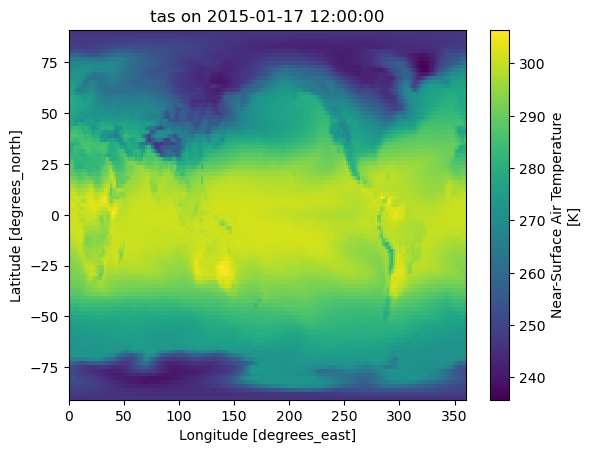

In [18]:
import matplotlib.pyplot as plt

# Load local GeoCroissant metadata JSON
with open("cmip6_tas_geocroissant.json", "r") as file:
    metadata = json.load(file)

print("GeoCroissant metadata loaded successfully")
print(f"Dataset name: {metadata['name']}")
print(f"Description: {metadata['description']}")

# Connect to CEDA using the same search as the original converter
from ceda_datapoint import DataPointClient

client = DataPointClient(org="CEDA")
search = client.search(
    collections=["cmip6"],
    query=[
        "cmip6:experiment_id=ssp585",
        "cmip6:activity_id=ScenarioMIP",
        "cmip6:institution_id=KIOST",
        "cmip6:variable_id=tas",
    ],
    max_items=1,
)

_, stac_item = next(iter(search.items.items()))
print("Connected to CEDA and found STAC item")

# Open the NetCDF dataset
ds = stac_item.open_dataset()
print(f"Dataset loaded: {ds.dims}")
print(f"Variables: {list(ds.data_vars)}")
print(f"Coordinates: {list(ds.coords)}")

# Select the variable and time slice, then plot
tas = ds["tas"].sel(time="2015-01-17 12:00:00").squeeze()
tas.plot()
plt.title("tas on 2015-01-17 12:00:00")
plt.show()